In [1]:
# set up the python
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs
import cmocean as cm
import cartopy.feature as cft
import cftime
import IPython.display
import sys, os, warnings

In [2]:
session = cc.database.create_session()

In [3]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 4
Total threads: 16,Total memory: 44.92 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:44449,Workers: 4
Dashboard: /proxy/8787/status,Total threads: 16
Started: Just now,Total memory: 44.92 GiB
Comm: tcp://10.0.128.153:39211,Total threads: 4
Dashboard: /proxy/45779/status,Memory: 11.23 GiB
Nanny: tcp://127.0.0.1:34411,


In [4]:
# load the MOM6 data
db='/g/data/ik11/outputs/mom6-panan/panant.db' 
expts = ['panant-v2','panant-hycom1','panant-01-zstar']

In [5]:
# time period
start_time = '1996-01-01'
end_time = '1997-01-01'
# set the threshold of density(AABW)
rho_AABW = 1037.125

In [6]:
# load ACCESS-OM2-01 streamfunction psi(x,y,rho,t)
expt = '01deg_jra55v13_iaf'
flux01 = cc.querying.getvar(expt,'tx_trans_rho', session, start_time=start_time, end_time=end_time)

In [66]:
# load MOM6 streamfunction psi(x,y,rho,t)
flux005 = cc.querying.getvar('panant-v2','umo',session,start_time=start_time, end_time=end_time)

In [67]:
# flux at -50
# ACCESS-OM2-01
flux01_1 = flux01.sel(time = slice(start_time,end_time)).sel(grid_xu_ocean = -50.,method='nearest')/1e9
flux01_1 = flux01_1.mean('time').cumsum('grid_yt_ocean').load()

# MOM6
flux005_1 = flux005.sel(time = slice(start_time,end_time)).sel(xq = -50.,method = 'nearest')/1e9
flux005_1 = flux005_1.mean('time').cumsum('yh').load()

In [76]:
# flux at -20
# ACCESS-OM2-01
flux01_2 = flux01.sel(time = slice(start_time,end_time)).sel(grid_xu_ocean = -20.,method='nearest')/1e9
flux01_2 = flux01_2.mean('time').cumsum('grid_yt_ocean').load()

# MOM6
flux005_2 = flux005.sel(time = slice(start_time,end_time)).sel(xq = -20.,method = 'nearest')/1e9
flux005_2 = flux005_2.mean('time').cumsum('yh').load()

In [70]:
# flux at 10
# ACCESS-OM2-01
flux01_3 = flux01.sel(time = slice(start_time,end_time)).sel(grid_xu_ocean = 10.,method='nearest')/1e9
flux01_3 = flux01_3.mean('time').cumsum('grid_yt_ocean').load()

# MOM6
flux005_3 = flux005.sel(time = slice(start_time,end_time)).sel(xq = 10.,method = 'nearest')/1e9
flux005_3 = flux005_3.mean('time').cumsum('yh').load()

In [71]:
# flux at 40
# ACCESS-OM2-01
flux01_4 = flux01.sel(time = slice(start_time,end_time)).sel(grid_xu_ocean = 40.,method='nearest')/1e9
flux01_4 = flux01_4.mean('time').cumsum('grid_yt_ocean').load()

# MOM6
flux005_4 = flux005.sel(time = slice(start_time,end_time)).sel(xq = 40.,method = 'nearest')/1e9
flux005_4 = flux005_4.mean('time').cumsum('yh').load()

In [72]:
# flux at 70
# ACCESS-OM2-01
flux01_5 = flux01.sel(time = slice(start_time,end_time)).sel(grid_xu_ocean = 70.,method='nearest')/1e9
flux01_5 = flux01_5.mean('time').cumsum('grid_yt_ocean').load()

# MOM6
flux005_5 = flux005.sel(time = slice(start_time,end_time)).sel(xq = 70.,method = 'nearest')/1e9
flux005_5 = flux005_5.mean('time').cumsum('yh').load()

Text(0, 0.5, 'streamfunction (Sv)')

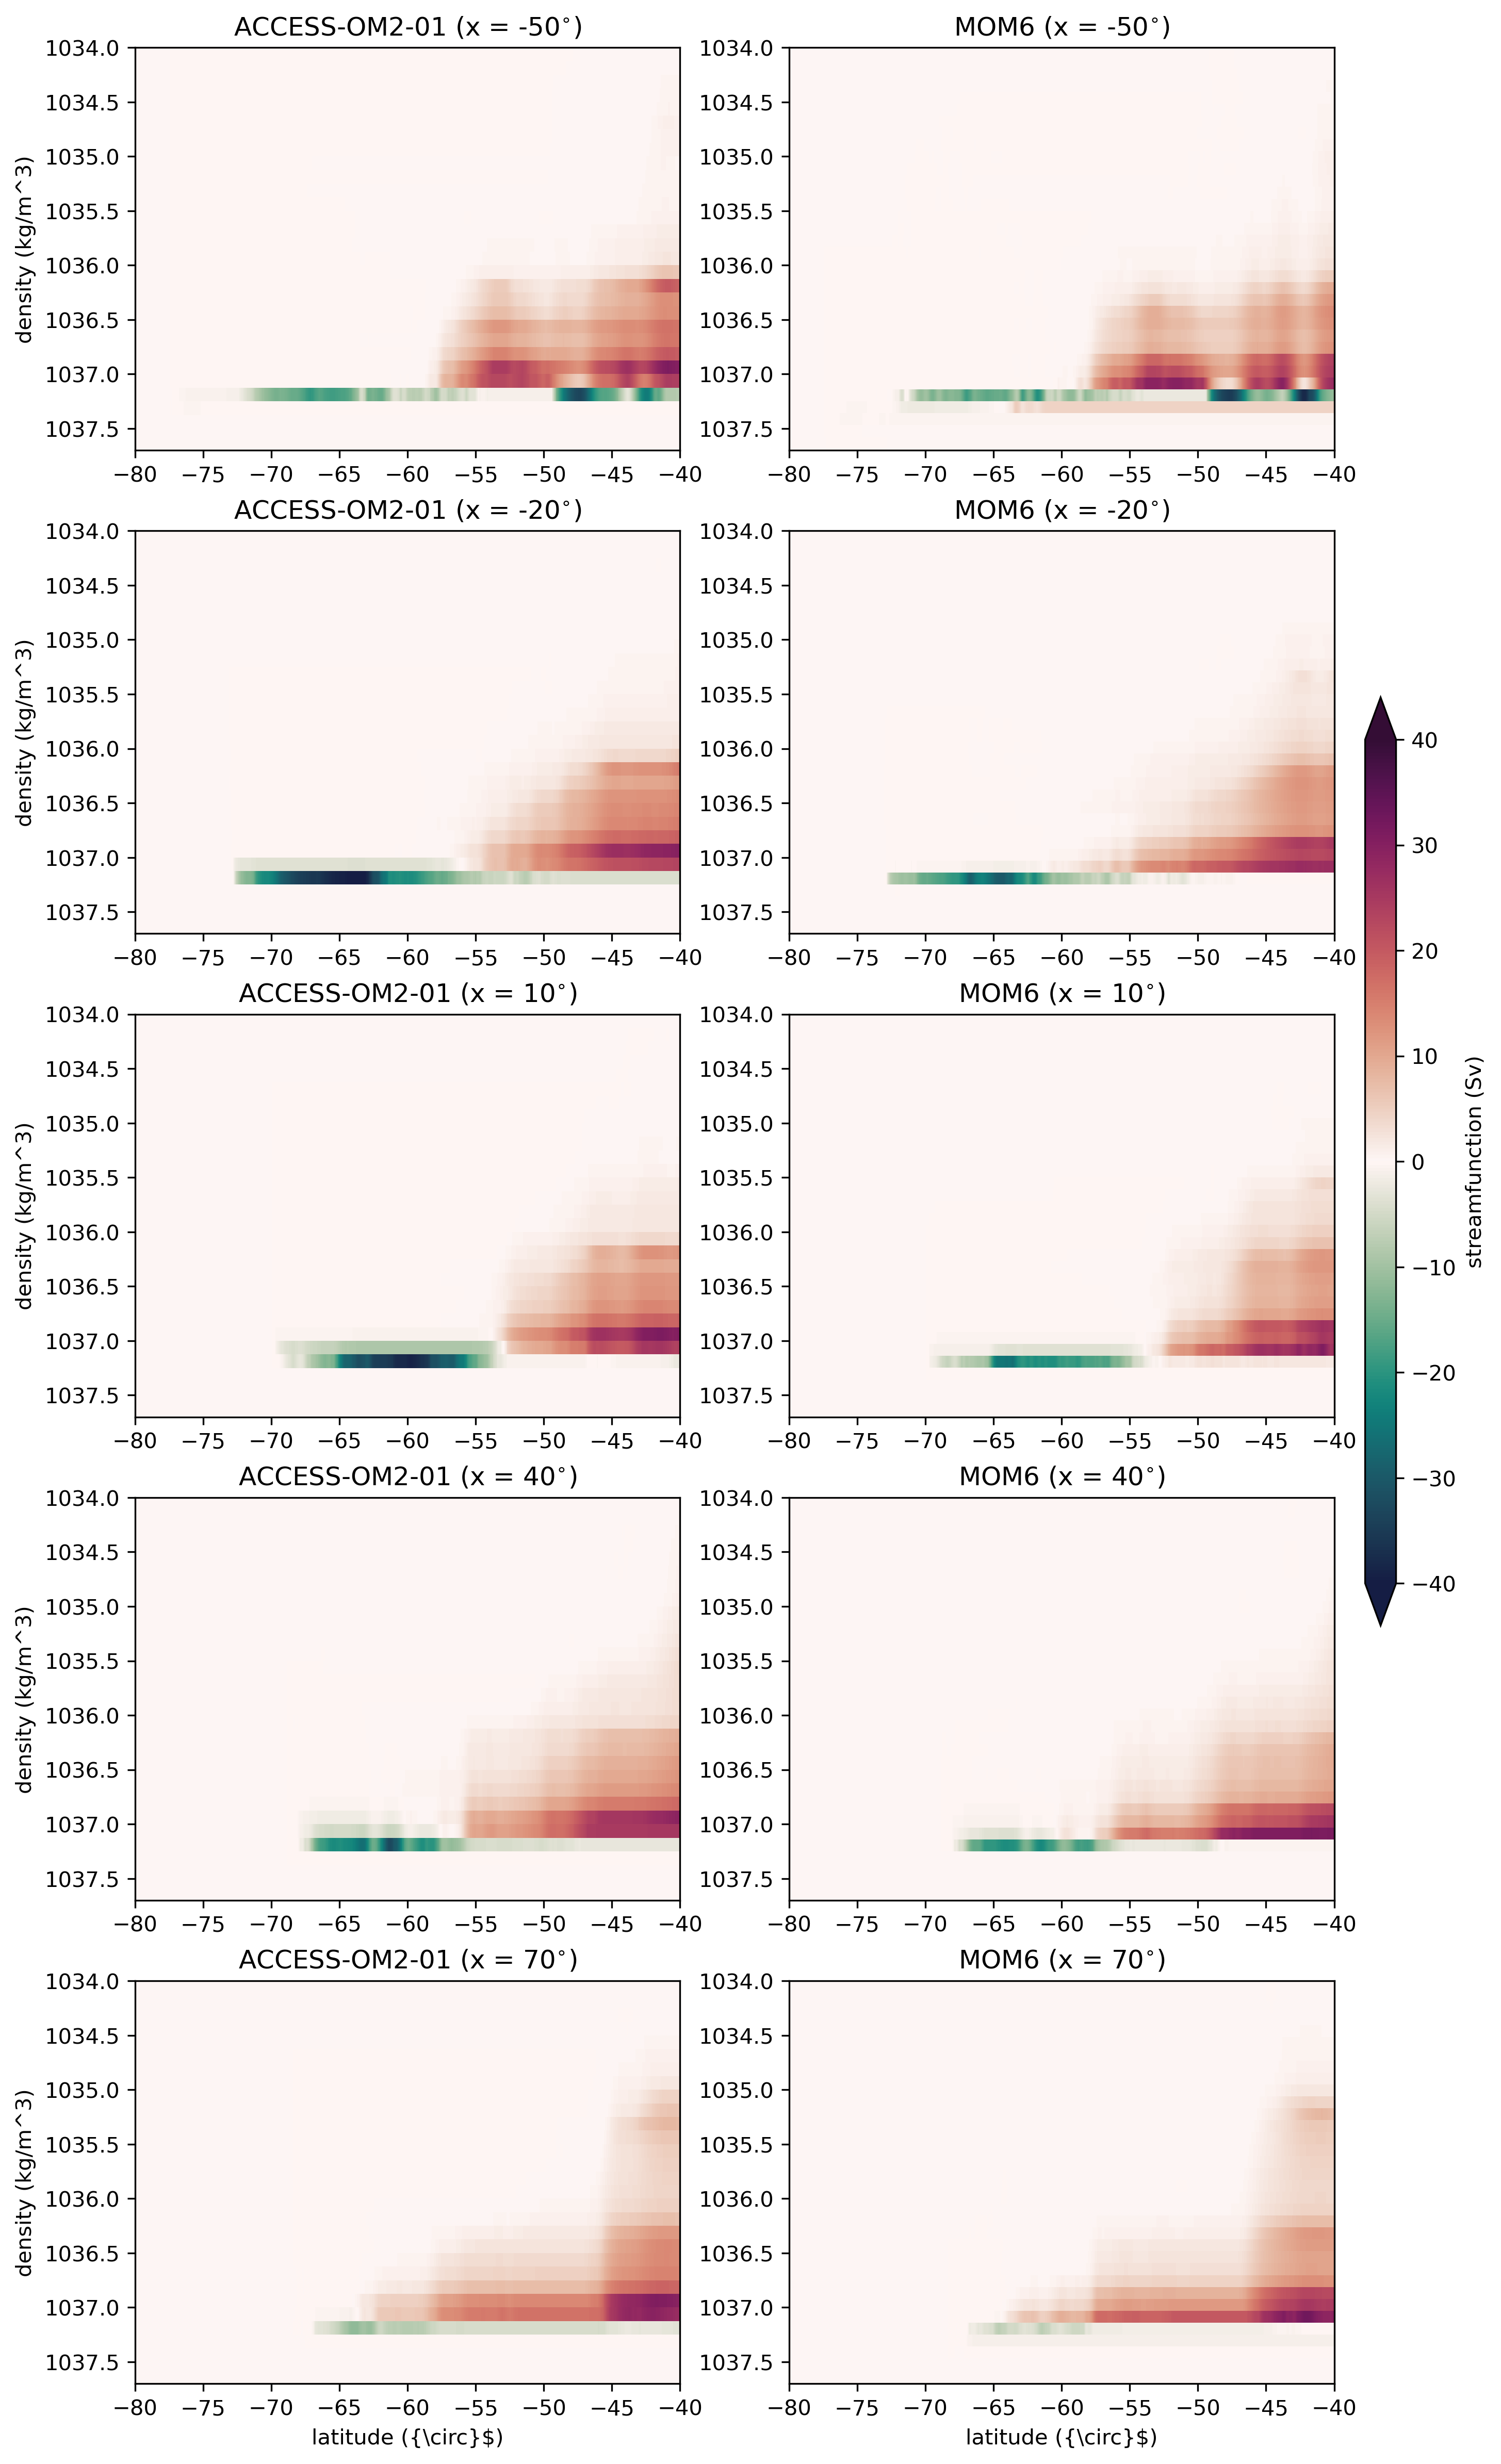

In [81]:
#plot of MOM6
# -50
plt.figure(figsize=(10,20),dpi = 300)
ax = plt.subplot(5,2,2)
p1 = flux005_1.plot(vmin = -40,vmax = 40, cmap=cm.cm.curl,add_colorbar = False)
plt.ylim(1034,1037.7)
plt.xlim(-80,-40)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_title('MOM6 (x = -50$^{\circ}$)')

# -20
ax = plt.subplot(5,2,4)
p1 = flux005_2.plot(vmin = -40,vmax = 40, cmap=cm.cm.curl,add_colorbar = False)
plt.ylim(1034,1037.7)
plt.xlim(-80,-40)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_title('MOM6 (x = -20$^{\circ}$)')

# 10
ax = plt.subplot(5,2,6)
p1 = flux005_3.plot(vmin = -40,vmax = 40, cmap=cm.cm.curl,add_colorbar = False)
plt.ylim(1034,1037.7)
plt.xlim(-80,-40)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_title('MOM6 (x = 10$^{\circ}$)')

# 40
ax = plt.subplot(5,2,8)
p1 = flux005_4.plot(vmin = -40,vmax = 40, cmap=cm.cm.curl,add_colorbar = False)
plt.ylim(1034,1037.7)
plt.xlim(-80,-40)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_title('MOM6 (x = 40$^{\circ}$)')

# 70
ax = plt.subplot(5,2,10)
p1 = flux005_5.plot(vmin = -40,vmax = 40, cmap=cm.cm.curl,add_colorbar = False)
plt.ylim(1034,1037.7)
plt.xlim(-80,-40)
plt.gca().invert_yaxis()
ax.set(ylabel=None)
plt.xlabel('latitude ({\circ}$)')
ax.set_title('MOM6 (x = 70$^{\circ}$)')



#plot of ACCESS-OM2-01
# -50
ax = plt.subplot(5,2,1)
p1 = flux01_1.plot(vmin = -40,vmax = 40, cmap=cm.cm.curl,add_colorbar = False)
plt.ylim(1034,1037.7)
plt.xlim(-80,-40)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
plt.ylabel('density (kg/m^3)')
ax.set_title('ACCESS-OM2-01 (x = -50$^{\circ}$)')

# -20
ax = plt.subplot(5,2,3)
p1 = flux01_2.plot(vmin = -40,vmax = 40, cmap=cm.cm.curl,add_colorbar = False)
plt.ylim(1034,1037.7)
plt.xlim(-80,-40)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
plt.ylabel('density (kg/m^3)')
ax.set_title('ACCESS-OM2-01 (x = -20$^{\circ}$)')

# 10
ax = plt.subplot(5,2,5)
p1 = flux01_3.plot(vmin = -40,vmax = 40, cmap=cm.cm.curl,add_colorbar = False)
plt.ylim(1034,1037.7)
plt.xlim(-80,-40)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
plt.ylabel('density (kg/m^3)')
ax.set_title('ACCESS-OM2-01 (x = 10$^{\circ}$)')

# 40
ax = plt.subplot(5,2,7)
p1 = flux01_4.plot(vmin = -40,vmax = 40, cmap=cm.cm.curl,add_colorbar = False)
plt.ylim(1034,1037.7)
plt.xlim(-80,-40)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
plt.ylabel('density (kg/m^3)')
ax.set_title('ACCESS-OM2-01 (x = 40$^{\circ}$)')

# 70
ax = plt.subplot(5,2,9)
p1 = flux01_5.plot(vmin = -40,vmax = 40, cmap=cm.cm.curl,add_colorbar = False)
plt.ylim(1034,1037.7)
plt.xlim(-80,-40)
plt.gca().invert_yaxis()
plt.ylabel('density (kg/m^3)')
plt.xlabel('latitude ({\circ}$)')
ax.set_title('ACCESS-OM2-01 (x = 70$^{\circ}$)')

#color bar
# add the colorbar
ax = plt.axes([0.92, 0.37, 0.02, 0.3])
cb = plt.colorbar(p1, cax=ax, orientation='vertical',extend = 'both')
cb.ax.set_ylabel('streamfunction (Sv)')